In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Initialize lists to store x and y data
x_data = []
y_data = []

# Define chunk size
chunk_size = 1000000  # Adjust as needed based on memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv("combined_photon_data_100_times.txt", sep="\t", chunksize=chunk_size, header=None):
    # Ensure that the values are strings to split them
    chunk[0] = chunk[0].astype(str)
    
    # Split the single column into two separate columns
    split_data = chunk[0].str.split(',', expand=True)

    # Convert to numeric, forcing non-convertible values to NaN
    chunk['x'] = pd.to_numeric(split_data[0], errors='coerce')
    chunk['y'] = pd.to_numeric(split_data[1], errors='coerce')

    # Drop any rows with NaN values
    chunk = chunk.dropna(subset=['x', 'y'])

    # Append the x and y data to the lists
    x_data.extend(chunk['x'].tolist())
    y_data.extend(chunk['y'].tolist())

# Convert the lists back to Series
x_data = pd.Series(x_data)
y_data = pd.Series(y_data)

# Optionally check the first few values
print("Final x_data:")
print(x_data.head())
print("Final y_data:")
print(y_data.head())


Final x_data:
0    0.000000e+00
1    5.001667e-11
2    1.000333e-10
3    1.500500e-10
4    2.000667e-10
dtype: float64
Final y_data:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64


In [10]:
print(x_data.size)

96000000


In [12]:
print(x_data[:-1])

0           0.000000e+00
1           5.001667e-11
2           1.000333e-10
3           1.500500e-10
4           2.000667e-10
                ...     
95999994    3.247900e-01
95999995    3.247900e-01
95999996    3.247900e-01
95999997    3.247900e-01
95999998    3.247900e-01
Length: 95999999, dtype: float64


In [20]:
print(y_data[95900000:])

95900000    0.000073
95900001    0.000073
95900002    0.000072
95900003    0.000072
95900004    0.000072
              ...   
95999995    0.000010
95999996    0.000010
95999997    0.000009
95999998    0.000009
95999999    0.000009
Length: 100000, dtype: float64


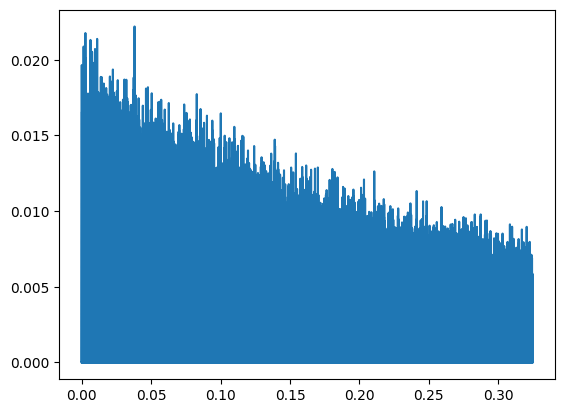

In [21]:
plt.plot(x_data, y_data)